In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Diamonds Prices2022.csv")

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [7]:
# renaming columns
df = df.drop('Unnamed: 0',axis=1)
df.columns = ['Weight', 'Cut_Quality', 'Color', 'Clarity', 'Depth', 'Table', 'Price', 'X_length', 'Y_width', 'Z_Depth']

In [8]:
df.head()

,Weight,Cut_Quality,Color,Clarity,Depth,Table,Price,X_length,Y_width,Z_Depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
df['Cut_Quality'].value_counts()

Cut_Quality
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64

In [10]:
df['Color'].value_counts()

Color
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

##### J > I > H > G > F > E > D [from worst to great]

In [11]:
df['Clarity'].value_counts()

Clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

##### I1 > SI2 > SI1 > VS2 > VS1 > VVS2 > VVS1 > IF [from worst to great] 

In [12]:
df.describe()

,Weight,Depth,Table,Price,X_length,Y_width,Z_Depth
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Data Cleaning 

In [13]:
# removing duplicates 
df[df.duplicated()]

,Weight,Cut_Quality,Color,Clarity,Depth,Table,Price,X_length,Y_width,Z_Depth
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17
52861,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
# handling null data
df.isnull().sum()

Weight         0
Cut_Quality    0
Color          0
Clarity        0
Depth          0
Table          0
Price          0
X_length       0
Y_width        0
Z_Depth        0
dtype: int64

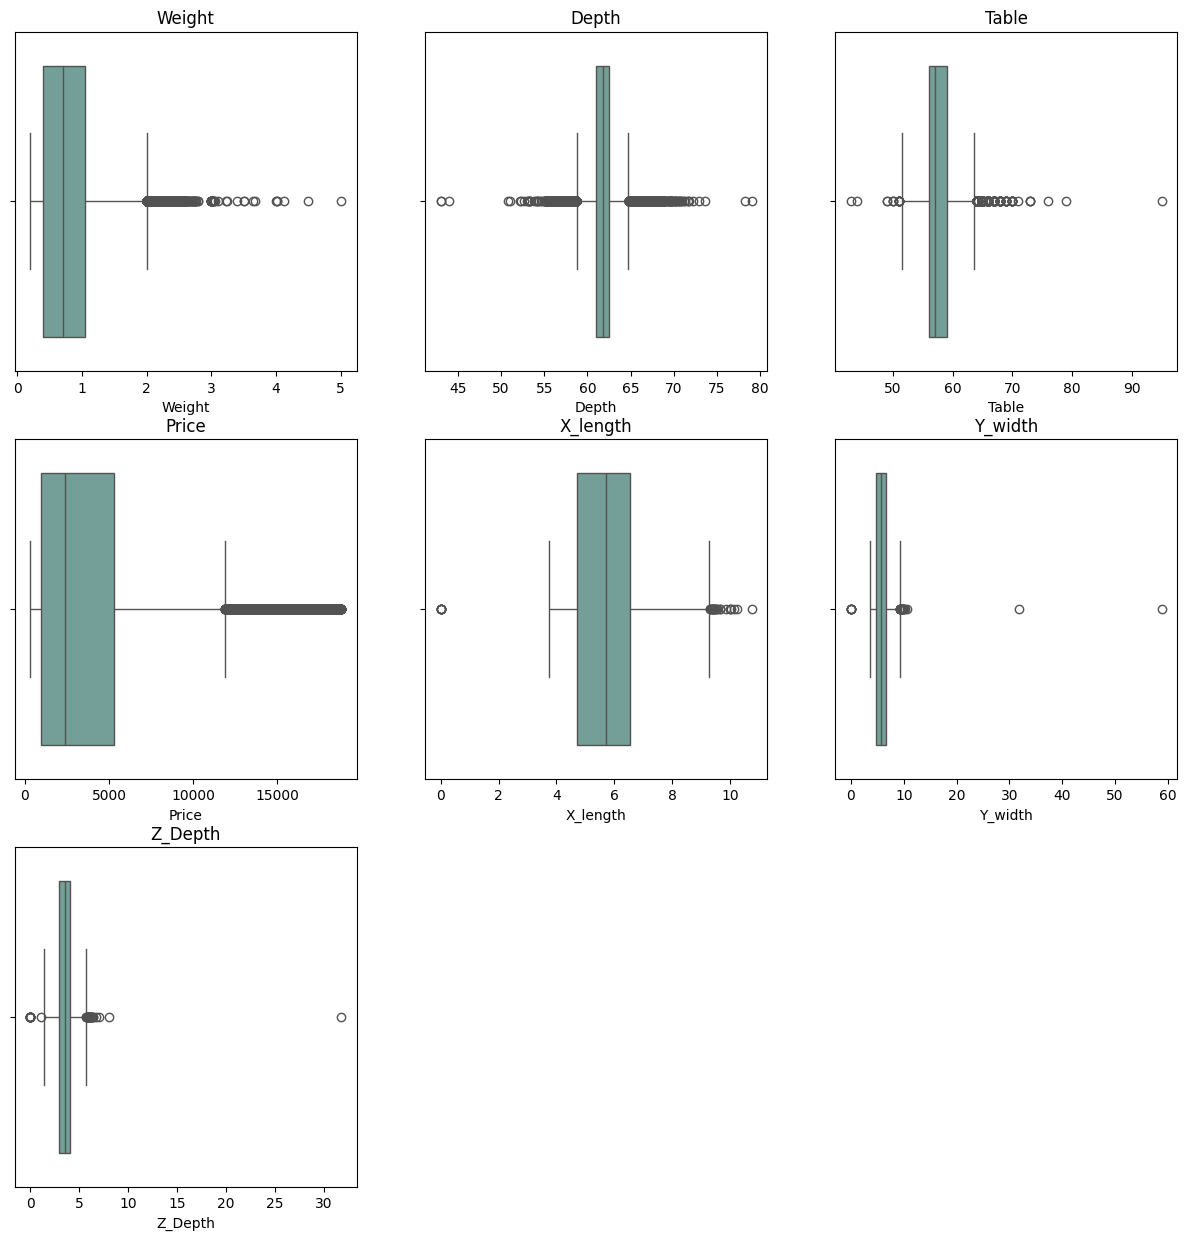

In [16]:
# detecting and removing outliers
numeric_cols = ['Weight', 'Depth', 'Table', 'Price', 'X_length', 'Y_width', 'Z_Depth']
plt.figure(figsize=(15, 15))
for i in range(7) :
    plt.subplot(3, 3, i+1)
    
    sns.boxplot(x=df[numeric_cols[i]],color='#6DA59D')
    plt.title(numeric_cols[i])
plt.show()

In [17]:
def detect_outliers(data,column) :
    q1 = df[column].quantile(.25)
    q3 = df[column].quantile(.75)
    IQR = q3 - q1
    
    lower_bound = q1 - (1.5*IQR)
    upper_bound = q3 + (1.5*IQR)
    
    ls = df.index[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return ls

In [18]:
index_list = []

for column in numeric_cols:
    index_list.extend(detect_outliers(df,column))
    
# removing duplicated indices in the index_list and sorting it
index_list = sorted(set(index_list))

In [19]:
before_remove = df.shape

df = df.drop(index_list)
after_remove = df.shape

print(f''' Shape of data before removing outliers : {before_remove}
      Shape of data after removing : {after_remove}''')

 Shape of data before removing outliers : (53794, 10)
      Shape of data after removing : (47416, 10)


## Data Visualization 

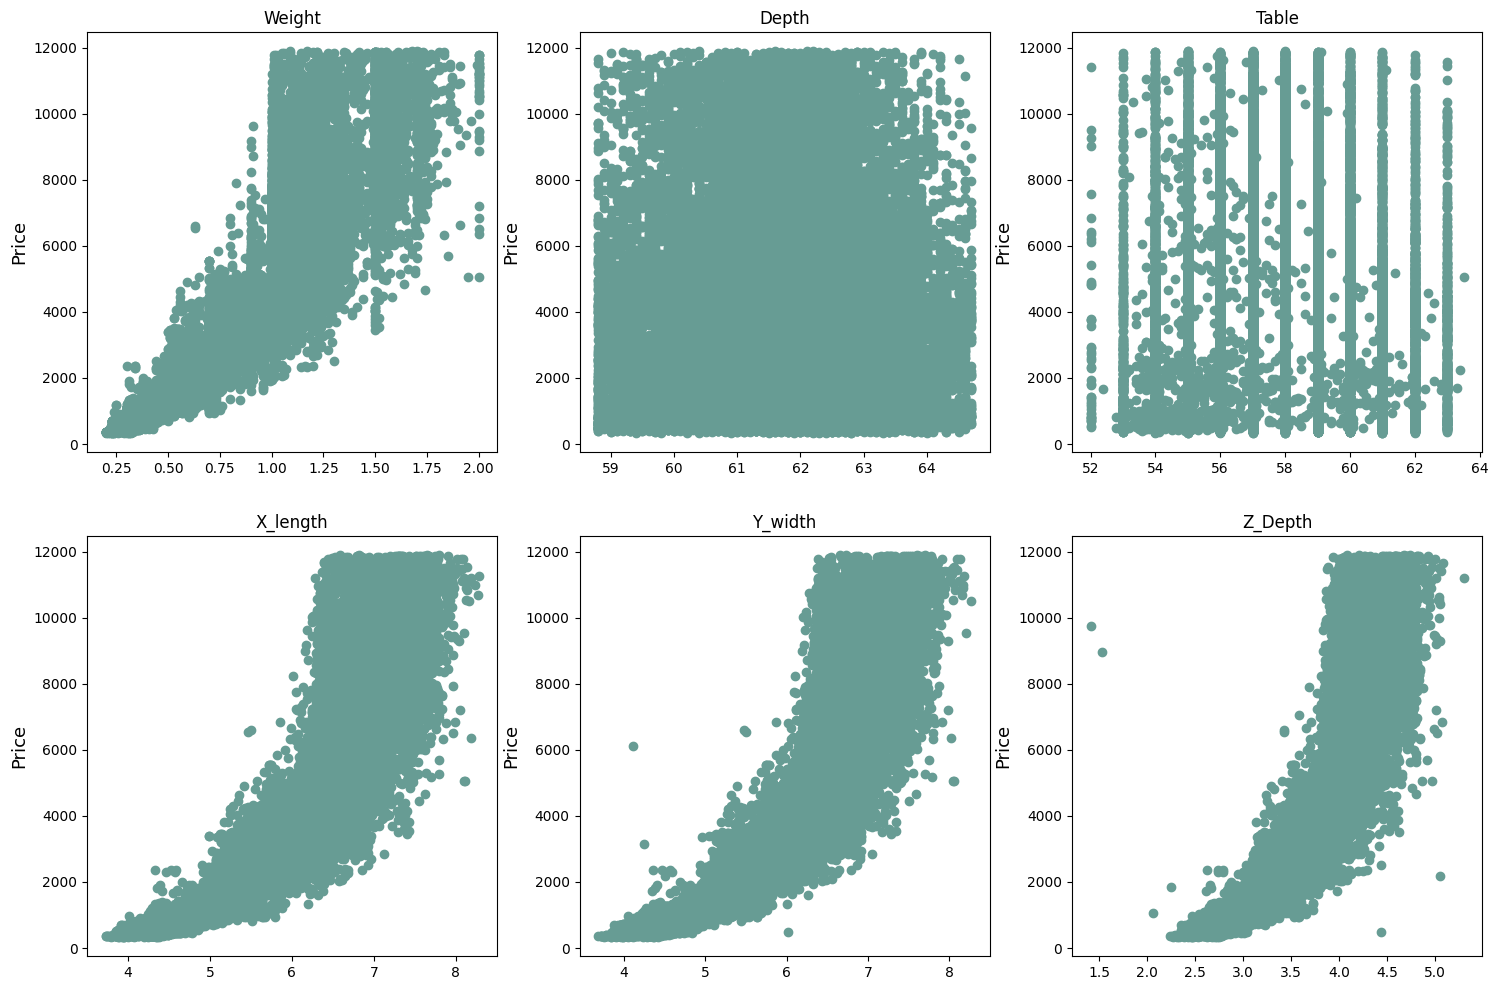

In [20]:
cols = ['Weight', 'Depth', 'Table', 'X_length', 'Y_width', 'Z_Depth']
plt.figure(figsize=(18, 12))
for i in range(6) :
    plt.subplot(2, 3, i+1)
    plt.scatter(df[cols[i]], df['Price'], color = '#679C94')
    plt.title(cols[i])
    plt.ylabel('Price', size = 13)
plt.show()

In [21]:
numeric_df = df.select_dtypes(include=['number'])
quality = numeric_df.groupby(df['Cut_Quality']).mean().sort_values('Price',ascending=False)
quality = quality[['Price']].round(2)
quality.reset_index(inplace=True)
quality

,Cut_Quality,Price
0,Fair,3701.98
1,Premium,3485.01
2,Very Good,3222.78
3,Good,3215.51
4,Ideal,2801.71


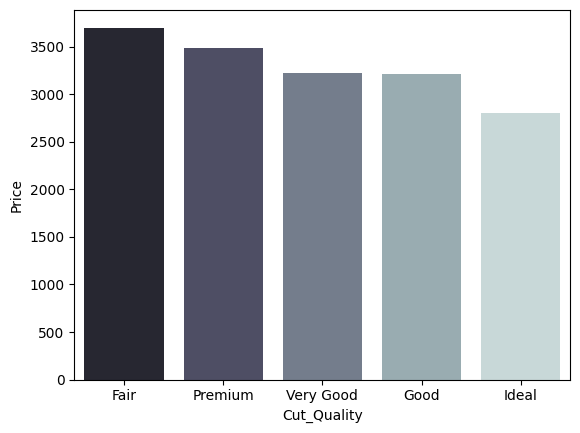

In [22]:
sns.barplot(x=quality['Cut_Quality'], y=quality['Price'], palette='bone')
plt.show()

In [23]:
print(df.columns)
df.columns = df.columns.str.strip()
print('Color' in df.columns)

Index(['Weight', 'Cut_Quality', 'Color', 'Clarity', 'Depth', 'Table', 'Price',
       'X_length', 'Y_width', 'Z_Depth'],
      dtype='object')
True


In [24]:
print(df['Color'].dtype)
print(df['Color'].head())

object
0    E
1    E
3    I
4    J
5    J
Name: Color, dtype: object


In [25]:
df['Color'] = df['Color'].astype(str)
color = df.groupby('Color', as_index=False)['Price'].mean().round(2).sort_values('Price', ascending=False)
color

,Color,Price
6,J,3895.46
5,I,3627.18
4,H,3507.42
3,G,3209.37
2,F,3069.83
0,D,2654.11
1,E,2588.76


<function matplotlib.pyplot.show(close=None, block=None)>

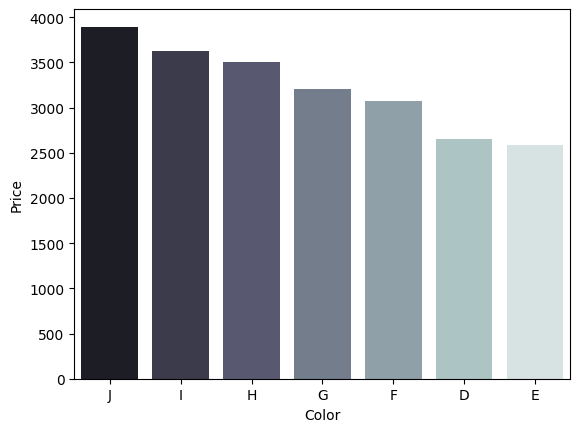

In [26]:
sns.barplot(x= color['Color'],y=color['Price'], palette='bone')
plt.show

In [27]:
numeric_df = df.select_dtypes(include=['number'])
clarity = df.groupby('Clarity', as_index=False)['Price'].mean().round(2).sort_values('Price', ascending=False)
clarity

,Clarity,Price
3,SI2,3760.29
0,I1,3296.18
2,SI1,3260.29
4,VS1,3142.50
5,VS2,3092.77
7,VVS2,2782.27
6,VVS1,2125.65
1,IF,2119.54


<function matplotlib.pyplot.show(close=None, block=None)>

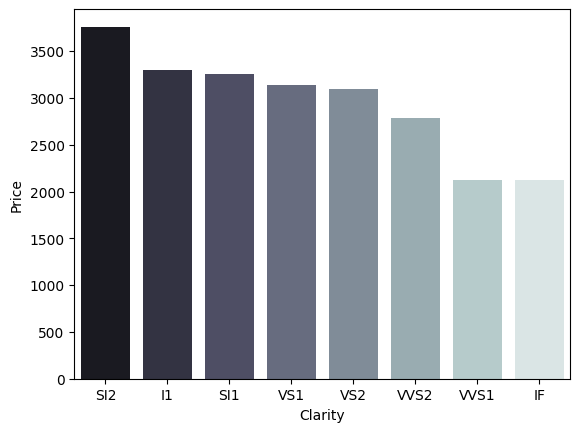

In [28]:
sns.barplot(x= clarity['Clarity'],y=clarity['Price'], palette='bone')
plt.show

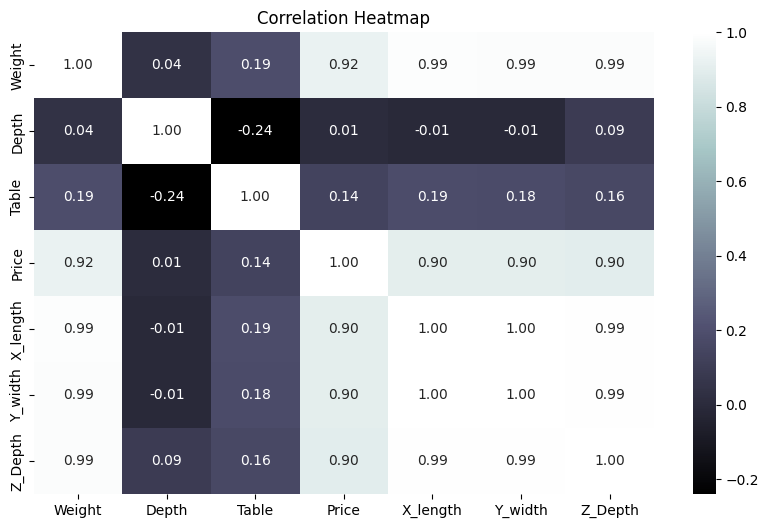

In [29]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='bone', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Data Preprocessing

#### Importing libraries for Machine Learning

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

##### Ordinary Encoding

In [31]:
df['Cut_Quality'] = df['Cut_Quality'].map({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
df['Color'] = df['Color'].map({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
df['Clarity'] = df['Clarity'].map({'I1':0, 'SI2':1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7})

##### Splitting Data [ features - target ]

In [32]:
x = df[['Weight', 'Cut_Quality', 'Color', 'Clarity', 'X_length', 'Y_width', 'Z_Depth']]
y = df[['Price']]

In [33]:
#scaling features
scaler = StandardScaler()
x = scaler.fit_transform(x)

##### Splitting Data [ train - test ]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,shuffle=True)

### Building Machine Learning Models

##### Linear Regression Model

In [35]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [36]:
y_pred = model.predict(x_test)

In [41]:
print(f''' The train accuracy : {r2_score(y_train,model.predict(x_train))}
The test accuracy : {r2_score(y_test , y_pred)}''')

 The train accuracy : 0.9149427555705856
The test accuracy : 0.912393725532


#### Ridge Regression Model

In [42]:
r_model = Ridge(alpha=2)
r_model.fit(x_train, y_train)

Ridge(alpha=2)

In [43]:
rg_pred = r_model.predict(x_test)

In [44]:
print(f''' The train accuracy : {r2_score(y_train, r_model.predict(x_train))}
The test accuracy : {r2_score(y_test, rg_pred)}''')

 The train accuracy : 0.9149416885628278
The test accuracy : 0.9123962013981729


##### Lasso Regression Model

In [45]:
l_model = Lasso(alpha=2)
l_model.fit(x_train, y_train)

Lasso(alpha=2)

In [46]:
ls_pred = l_model.predict(x_test)

In [47]:
print(f''' The train accuracy : {r2_score(y_train, l_model.predict(x_train))}
The test accuracy : {r2_score(y_test, ls_pred)}''')

 The train accuracy : 0.9145538739322148
The test accuracy : 0.9119468366010255


##### Polynomial Regression Model

In [48]:
polynomial = PolynomialFeatures(degree=3)

x_poly = polynomial.fit_transform(x)
p_x_train , p_x_test, p_y_train, p_y_test = train_test_split(x_poly,y,test_size=.2,shuffle=True)

In [49]:
model2 = LinearRegression()
model2.fit(p_x_train,p_y_train)

LinearRegression()

In [50]:
p_pred = model2.predict(p_x_test)

In [51]:
print(f''' The train accuracy : {r2_score(p_y_train,model2.predict(p_x_train))}
The test accuracy : {r2_score(p_y_test,p_pred)}''')

 The train accuracy : 0.9782441591371861
The test accuracy : 0.8523860225259753


##### Random Forest Regression Model

In [52]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(x_train,y_train)

RandomForestRegressor()

In [53]:
random_f_pred = random_forest.predict(x_test)

In [54]:
r2_score(y_test,random_f_pred)

0.9828391288812806

We got [.98] accuracy as the highest preformance by Random Forest Regressor

##### Applying Cross Validation on Linear Regression

In [55]:
scores = cross_val_score(LinearRegression(),x_train,y_train,cv=6)
print('The accuracy of cross validation applying on regression model :', scores.mean())

The accuracy of cross validation applying on regression model : 0.9148824562852239
